# Lab 2

## Importing Libraries

In [4]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error

## Getting the Dataset

In [5]:
df = pd.read_csv('./sample_data/co2.csv', sep=',')

### First 5 Rows

In [8]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Visualizing Data

### Jointplot

#### Jointplot Engine Size and CO2 Emissions

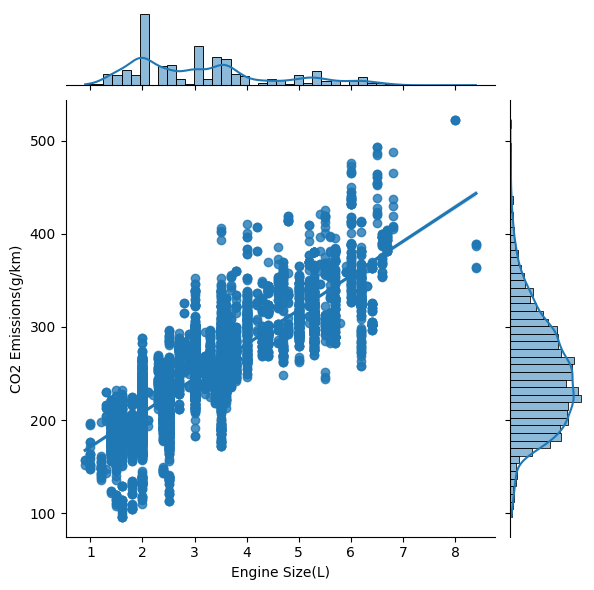

In [13]:
sns.jointplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df, kind="reg")
plt.show()

#### Jointplot Fuel Consumption and CO2 Emissions

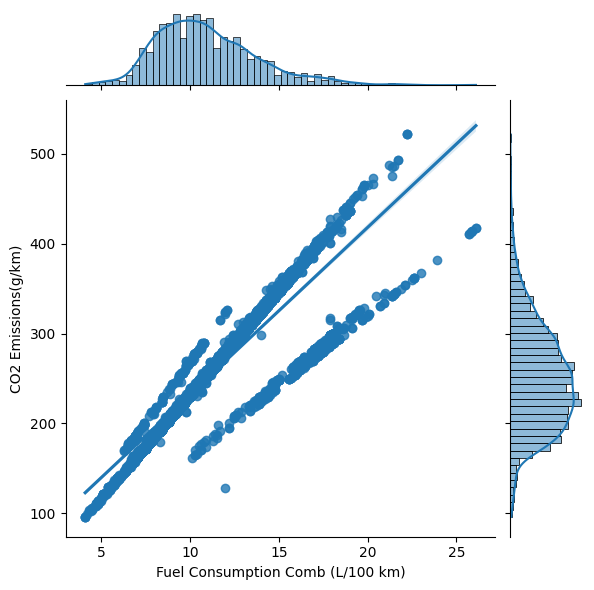

In [14]:
sns.jointplot(x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", data=df, kind="reg")
plt.show()

### Boxplot for vehicle classes

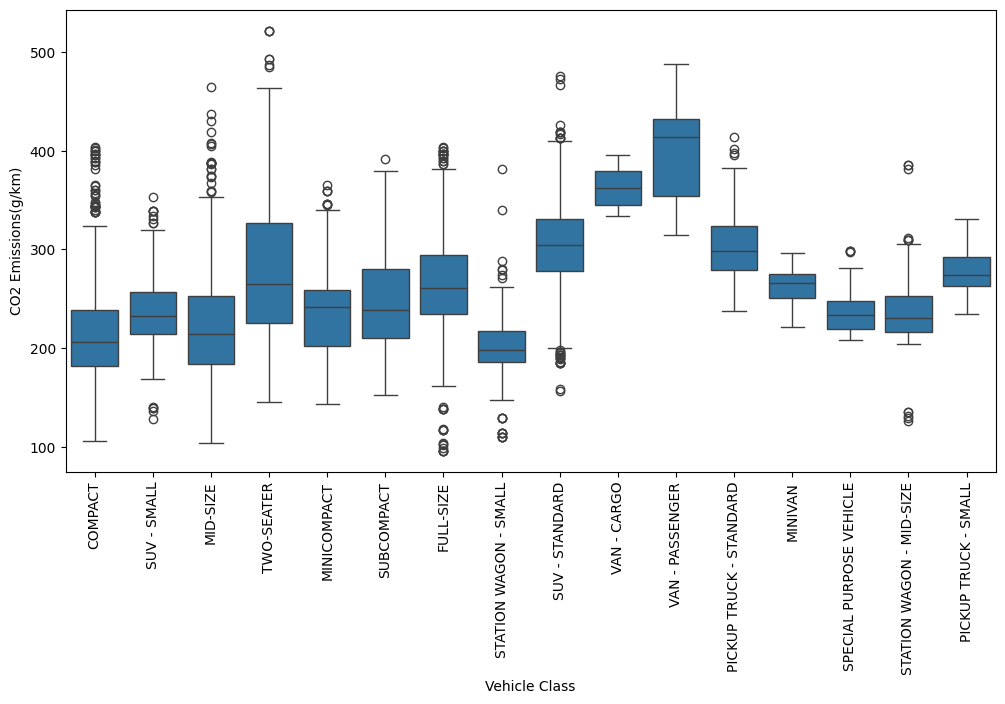

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df)
plt.xticks(rotation=90)
plt.show()

## Min-Max Normalization

In [21]:
numerical_features = ["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)",
                      "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)",
                      "Fuel Consumption Comb (mpg)", "CO2 Emissions(g/km)"]
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,0.146667,0.076923,AS5,Z,0.215909,0.162651,0.200000,0.379310,0.234742
1,ACURA,ILX,COMPACT,0.200000,0.076923,M6,Z,0.265152,0.222892,0.250000,0.310345,0.293427
2,ACURA,ILX HYBRID,COMPACT,0.080000,0.076923,AV7,Z,0.068182,0.108434,0.081818,0.637931,0.093897
3,ACURA,MDX 4WD,SUV - SMALL,0.346667,0.230769,AS6,Z,0.321970,0.307229,0.318182,0.241379,0.373239
4,ACURA,RDX AWD,SUV - SMALL,0.346667,0.230769,AS6,Z,0.299242,0.283133,0.295455,0.275862,0.347418


## Splitting Data

In [22]:
X = df[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]]
y = df["CO2 Emissions(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Data

### Linear Regression

In [23]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Ridge Regression with Cross-Validation

In [24]:
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0])

### Lasso Regression with Cross-Validation

In [25]:
lasso_model = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

### ElasticNet Regression

In [26]:
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

### Bayesian Ridge Regression

In [27]:
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

BayesianRidge()

## Evaluation

### Mean Square Error

In [33]:
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "ElasticNet Regression": elastic_model,
    "Bayesian Ridge Regression": bayesian_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{name}: {mse:.4f}")

Linear Regression: 0.0023
Ridge Regression: 0.0023
Lasso Regression: 0.0190
ElasticNet Regression: 0.0190
Bayesian Ridge Regression: 0.0023


### Coefficients

In [34]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Linear": linear_model.coef_,
    "Ridge": ridge_model.coef_,
    "Lasso": lasso_model.coef_,
    "ElasticNet": elastic_model.coef_,
    "Bayesian Ridge": bayesian_model.coef_
})

coefficients

,Feature,Linear,Ridge,Lasso,ElasticNet,Bayesian Ridge
0,Engine Size(L),0.098498,0.099838,0.0,0.0,0.098676
1,Cylinders,0.194719,0.194273,0.0,0.0,0.194660
2,Fuel Consumption Comb (L/100 km),0.685322,0.683515,0.0,0.0,0.685084


### Optimal Alpha

In [32]:
print(f"Optimal alpha for Ridge: {ridge_model.alpha_}")
print(f"Optimal alpha for Lasso: {lasso_model.alpha_}")

Optimal alpha for Ridge: 0.1
Optimal alpha for Lasso: 10.0


## Conclusion

За оваа задача, користевме пет регресионни модели:
1. **Linear Regression**
2. **Ridge Regression**
3. **Lasso Regression**
4. **ElasticNet Regression**
5. **Bayesian Ridge**

Избравме колони како Engine Size, Cylinders, и Fuel Consumption Comb, бидејќи тие имаат директна врска со потрошувачката на гориво и емисијата на CO2. Овие атрибути се важни за нашето моделирање бидејќи влијаат на количината на CO2 што автомобилите го емитуваат. Визуализации одбрани:
1. **Jointplot** ни помогна да ги видиме врските помеѓу парови атрибути, додека pairplot овозможи да се анализираат сите атрибути во однос на една на друга, прикажувајќи ни потенцијални трендови и корелации.
2. **Boxplot** беше користен за визуелизација на распределбата на вредностите за секој атрибут, што ни помогна да ја разбереме варијабилноста и да ги идентификуваме евентуалните аномалии.

Резултатите покажаа дека **Linear**, **Ridge**, и **Bayesian Ridge** моделите даваат слични MSE вредности (0.0023), што кажува дека тие модели се стабилни и добро се прилагодуваат на податочното множество. Од друга страна, **Lasso** и **ElasticNet** ја елиминираа важноста на некои карактеристики, поставувајќи ги нивните коефициенти на нула и заедно со тоа добиваат полоши резултати (0.019). Ова покажува дека тие методи вршат автоматска селекција на карактеристики и може да бидат корисни во случаи со многу ирелевантни атрибути.

Оптималните alpha вредности, како што се 0.1 за Ridge и 10.0 за Lasso, ја контролираат силата на регуларизацијата, каде што помала вредност дозволува поголема флексибилност на моделот, а поголема вредност ја ограничува комплексноста на моделот за да се избегне **overfitting**.